In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

ts_data = pd.read_csv('AirPassengers.csv')


In [3]:
ts_data['Month'][0]


'1949-01'

In [4]:
ts_data


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
ts_data["Month"]=pd.to_datetime(ts_data['Month'])
print(type(ts_data["Month"][0]))
ts_data =ts_data.set_index(["Month"])

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [6]:
type(ts_data)

pandas.core.frame.DataFrame

In [7]:
ts_data.head(13)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


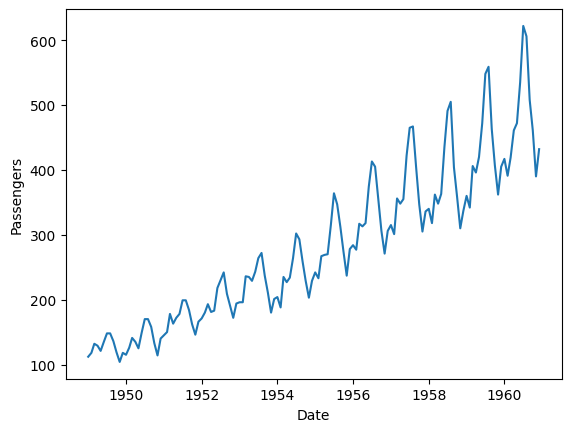

In [8]:
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.plot(ts_data)

In [9]:
rol_mean=ts_data.rolling(window=12).mean()
rol_std =ts_data.rolling(window=12).std()


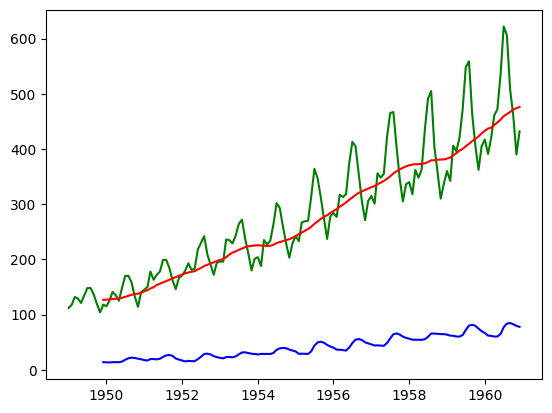

In [10]:
plt.plot(ts_data,c="green")
plt.plot(rol_mean,c="red")
plt.plot(rol_std,c="blue")

In [11]:
from statsmodels.tsa.stattools import adfuller

adftest=adfuller(ts_data["#Passengers"])
print(adftest)

(0.8153688792060441, 0.9918802434376409, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


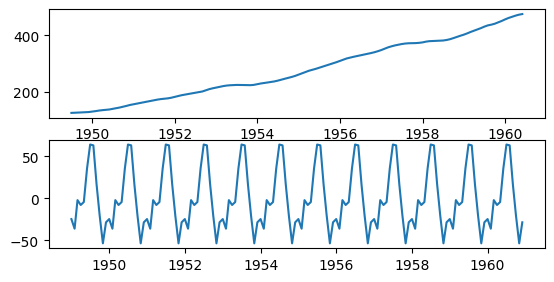

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(ts_data)

trend=decompose.trend
seasonal=decompose.seasonal

plt.subplot(311)
plt.plot(trend)
plt.subplot(312)
plt.plot(seasonal)

# conversion

In [13]:
print(ts_data["#Passengers"] - ts_data["#Passengers"].shift(2))
new_ts=ts_data["#Passengers"] - ts_data["#Passengers"].shift(2)
new_ts

Month
1949-01-01      NaN
1949-02-01      NaN
1949-03-01     20.0
1949-04-01     11.0
1949-05-01    -11.0
              ...  
1960-08-01     71.0
1960-09-01   -114.0
1960-10-01   -145.0
1960-11-01   -118.0
1960-12-01    -29.0
Name: #Passengers, Length: 144, dtype: float64


Month
1949-01-01      NaN
1949-02-01      NaN
1949-03-01     20.0
1949-04-01     11.0
1949-05-01    -11.0
              ...  
1960-08-01     71.0
1960-09-01   -114.0
1960-10-01   -145.0
1960-11-01   -118.0
1960-12-01    -29.0
Name: #Passengers, Length: 144, dtype: float64

In [14]:
adfuller(new_ts.dropna())

(-2.9616951355554235,
 0.03862975767698849,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 985.7309222414161)

In [15]:
new_ts

Month
1949-01-01      NaN
1949-02-01      NaN
1949-03-01     20.0
1949-04-01     11.0
1949-05-01    -11.0
              ...  
1960-08-01     71.0
1960-09-01   -114.0
1960-10-01   -145.0
1960-11-01   -118.0
1960-12-01    -29.0
Name: #Passengers, Length: 144, dtype: float64

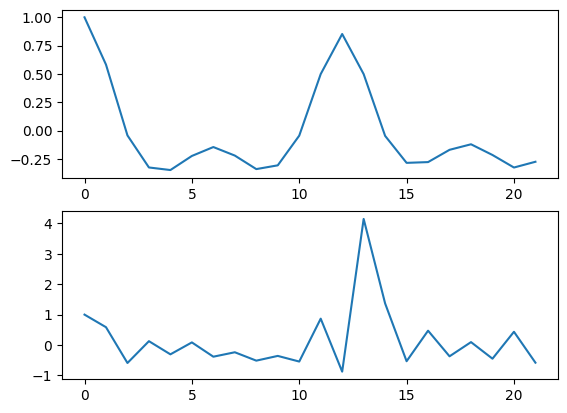

In [16]:
from statsmodels.tsa.stattools import acf,pacf
d_acf=acf(new_ts.dropna())
d_pacf=pacf(new_ts.dropna())
plt.subplot(211)
plt.plot(d_acf)
plt.subplot(212)
plt.plot(d_pacf)

In [17]:
from statsmodels.tsa.arima.model import ARIMA
model =ARIMA(ts_data,order=(2,2,1),seasonal_order=(2,2,1,12))
model_fit =model.fit()


C:\Users\Hashim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hashim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hashim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hashim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\L

In [18]:
res =model_fit.forecast(24)

In [19]:

res=pd.DataFrame(res)
res.columns=["#Passengers"]
final_data =pd.DataFrame(ts_data)
pred_data=final_data.append(res)
type(pred_data)

C:\Users\Hashim\AppData\Local\Temp\ipykernel_29860\1822749830.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_data=final_data.append(res)


pandas.core.frame.DataFrame

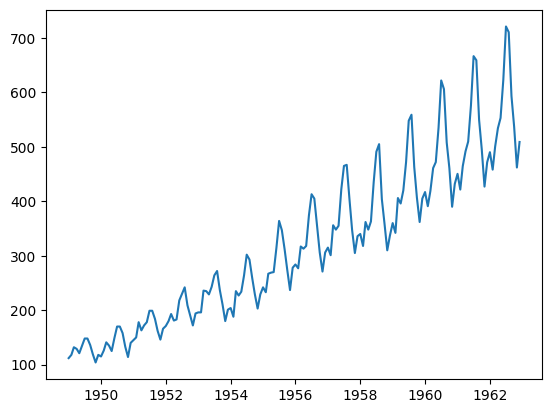

In [20]:
plt.plot(pred_data)

In [21]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

In [22]:
from statsmodels.tsa.arima.model import ARIMA
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima.model:

class ARIMA(statsmodels.tsa.statespace.sarimax.SARIMAX)
 |  ARIMA(endog, exog=None, order=(0, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, enforce_stationarity=True, enforce_invertibility=True, concentrate_scale=False, trend_offset=1, dates=None, freq=None, missing='none', validate_specification=True)
 |  
 |  Autoregressive Integrated Moving Average (ARIMA) model, and extensions
 |  
 |  This model is the basic interface for ARIMA-type models, including those
 |  with exogenous regressors and those with seasonal components. The most
 |  general form of the model is SARIMAX(p, d, q)x(P, D, Q, s). It also allows
 |  all specialized cases, including
 |  
 |  - autoregressive models: AR(p)
 |  - moving average models: MA(q)
 |  - mixed autoregressive moving average models: ARMA(p, q)
 |  - integration models: ARIMA(p, d, q)
 |  - seasonal models: SARIMA(P, D, Q, s)
 |  - regression with errors that follow one of the above ARIM